In [1]:
import pandas as pd
import numpy as np 

import gc
gc.collect()

0

In [2]:
seasons = list(range(2009,2019)) # creates list of years through 2018

# merge seasons into one df
df = pd.DataFrame()
for season in seasons:
    path = './../data/nflscrapR-data/play_by_play_data/regular_season/reg_pbp_'+str(season)+'.csv'
    season_df = pd.read_csv(path)
    season_df['season'] = season
    df = pd.concat([df, season_df], axis=0)
    path = './../data/nflscrapR-data/play_by_play_data/post_season/post_pbp_'+str(season)+'.csv'
    post_season_df = pd.read_csv(path)
    post_season_df['season'] = season
    df = pd.concat([df, post_season_df], axis=0)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (42,166,167,174,175,178,179,182,183,188,189,190,191,203,204,205,231,232,233,238,240,241) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (37,38,39,42,46,47,166,167,168,169,172,173,174,175,176,177,178,179,182,183,184,185,188,189,190,191,192,193,194,195,198,199,203,204,205,224,225,226,227,231,232,233,238,240,241,244,245,246,250) have mixed types. Speci

In [3]:
print(list(df))
print(df.play_type.unique())

['air_epa', 'air_wpa', 'air_yards', 'assist_tackle', 'assist_tackle_1_player_id', 'assist_tackle_1_player_name', 'assist_tackle_1_team', 'assist_tackle_2_player_id', 'assist_tackle_2_player_name', 'assist_tackle_2_team', 'assist_tackle_3_player_id', 'assist_tackle_3_player_name', 'assist_tackle_3_team', 'assist_tackle_4_player_id', 'assist_tackle_4_player_name', 'assist_tackle_4_team', 'away_team', 'away_timeouts_remaining', 'away_wp', 'away_wp_post', 'blocked_player_id', 'blocked_player_name', 'comp_air_epa', 'comp_air_wpa', 'comp_yac_epa', 'comp_yac_wpa', 'complete_pass', 'def_wp', 'defensive_extra_point_attempt', 'defensive_extra_point_conv', 'defensive_two_point_attempt', 'defensive_two_point_conv', 'defteam', 'defteam_score', 'defteam_score_post', 'defteam_timeouts_remaining', 'desc', 'down', 'drive', 'ep', 'epa', 'extra_point_attempt', 'extra_point_prob', 'extra_point_result', 'fg_prob', 'field_goal_attempt', 'field_goal_result', 'first_down_pass', 'first_down_penalty', 'first_do

In [4]:
# print(df[['side_of_field','defteam','yardline_100']].head(50))

# drop redzone plays
df = df.loc[df.yardline_100 > 20]

# drop extreme win probabilities (about 4% of plays)
df = df.loc[(df['wp']>=0.1) | (df['wp']<=0.9)]

df = df.loc[df['yards_gained']>=-15]
df.dropna(subset=['yards_gained'],inplace=True)

# drop afc and nfc
print(len(df))
conf_teams = ['AFC','NFC','IRV','APR','NPR','RIC']
df = df.loc[~df['posteam'].isin(conf_teams)]

print(len(df))


383113
381988


In [5]:
# throwaway code used for stats in the article

# sea18 = df.loc[df.season==2018]
# a10 = sea18.loc[sea18.yards_gained>=10]
# gb = a10.groupby(['posteam'])['touchdown'].sum()
# print(gb.sort_values(ascending=False))

# 280 | 18.73 5244
# 272 | 18.18 4945
# 256 | 20.98 5376

posteam
KC     17.0
MIA    17.0
ATL    15.0
NE     15.0
PIT    15.0
LAC    14.0
MIN    13.0
SF     13.0
DAL    12.0
DEN    12.0
TB     12.0
GB     11.0
NO     11.0
SEA    11.0
CLE    11.0
LA     10.0
NYJ     9.0
PHI     9.0
BUF     8.0
CAR     8.0
IND     8.0
CHI     8.0
CIN     8.0
NYG     8.0
WAS     7.0
DET     7.0
HOU     7.0
JAX     7.0
TEN     7.0
ARI     7.0
BAL     6.0
OAK     5.0
Name: touchdown, dtype: float64


In [6]:
# run or pass
runs = df.loc[df['play_type']=='run']
passes = df.loc[df['play_type'] == 'pass']


In [7]:
run_gains = runs.yards_gained.values
pass_gains = passes.yards_gained.values

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, ax = plt.subplots()

# sns.distplot(run_gains, bins=40, kde=False, rug=False);
# sns.distplot(pass_gains, bins=40, kde=False, rug=False);

sns.kdeplot(run_gains, shade=True, label="runs");
sns.kdeplot(pass_gains, shade=True, label="passes");

ax.set_title('Run Play Yards Gained')
ax.set_xlabel('Yards Gained')
ax.set_ylabel('Pct Plays')

plt.show()

fig.savefig('./images/runvpass.png', bbox_inches = "tight")

<Figure size 640x480 with 1 Axes>

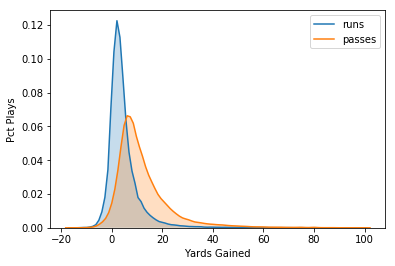

In [9]:
completions = passes.loc[passes.complete_pass==1]
comp_gains = completions.yards_gained

fig, ax = plt.subplots()

sns.kdeplot(run_gains, shade=True, label="runs");
sns.kdeplot(comp_gains, shade=True, label="passes");

ax.set_xlabel('Yards Gained')
ax.set_ylabel('Pct Plays')

plt.show()

fig.savefig('./images/runvcomp.png', bbox_inches = "tight")

In [10]:
print(np.mean(run_gains))
print(np.mean(comp_gains))

4.663858746571726
12.115850659952397


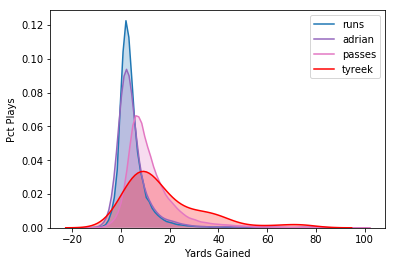

In [11]:
adrian = runs.loc[runs['rusher_player_name'] == 'A.Peterson']
adrian = adrian.loc[adrian['season']<=2015]
ap_gains = adrian.yards_gained

thill = completions.loc[completions['receiver_player_name']=='T.Hill'] 
thill = thill.loc[thill['season']==2018]
thill_gains = thill.yards_gained

fig, ax = plt.subplots()

sns.kdeplot(run_gains, shade=True, label="runs");
sns.kdeplot(ap_gains, shade=True, color="tab:purple", label="adrian");

sns.kdeplot(comp_gains, shade=True, color="tab:pink", label="passes");
sns.kdeplot(thill_gains, shade=True, color="r", label="tyreek");

ax.set_xlabel('Yards Gained')
ax.set_ylabel('Pct Plays')

plt.show()

fig.savefig('./images/runvap.png', bbox_inches = "tight")

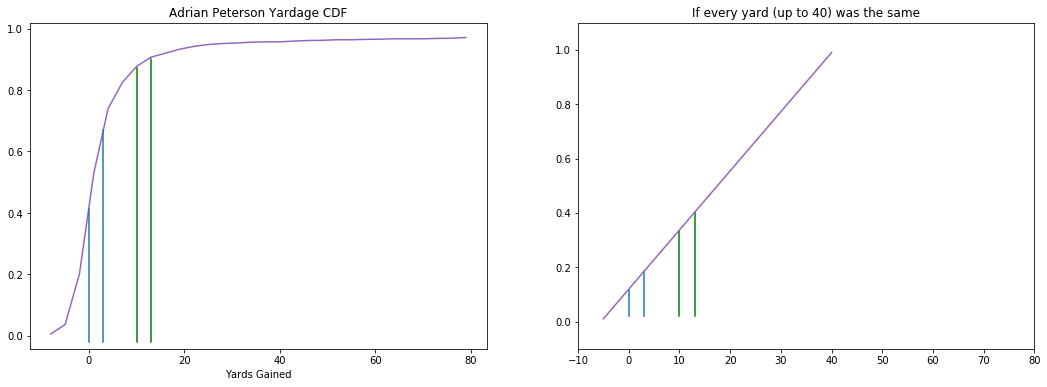

In [12]:
fig = plt.figure(figsize=(18,6))

ax1 = plt.subplot(1, 2, 1)

values, base = np.histogram(ap_gains,bins=30)
values = values/(len(values)*54)
ap_cum = np.cumsum(values)
plt.plot(base[:-1], ap_cum, c='tab:purple')

ax1.axvline(x=0,ymin=0.02,ymax=0.43)
ax1.axvline(x=3,ymin=0.02,ymax=0.67)
ax1.axvline(x=10,ymin=0.02,ymax=0.86,color='g')
ax1.axvline(x=13,ymin=0.02,ymax=0.89,color='g')

ax1.set_title('Adrian Peterson Yardage CDF')
ax1.set_xlabel('Yards Gained')

ax2 = plt.subplot(1, 2, 2)

ax2.set(xlim=(-10, 80), ylim=(-0.1, 1.1))

# weird, the y-scale isn't the same 
ax2.axvline(x=0,ymin=0.1,ymax=0.18)
ax2.axvline(x=3,ymin=0.1,ymax=0.24)
ax2.axvline(x=10,ymin=0.1,ymax=0.36,color='g')
ax2.axvline(x=13,ymin=0.1,ymax=0.42,color='g')

ax2.plot([-5,40], [0.01,.99], c="tab:purple")
ax2.set_title("If every yard (up to 40) was the same")

fig.savefig('./images/apcum.png', bbox_inches = "tight")
plt.show()

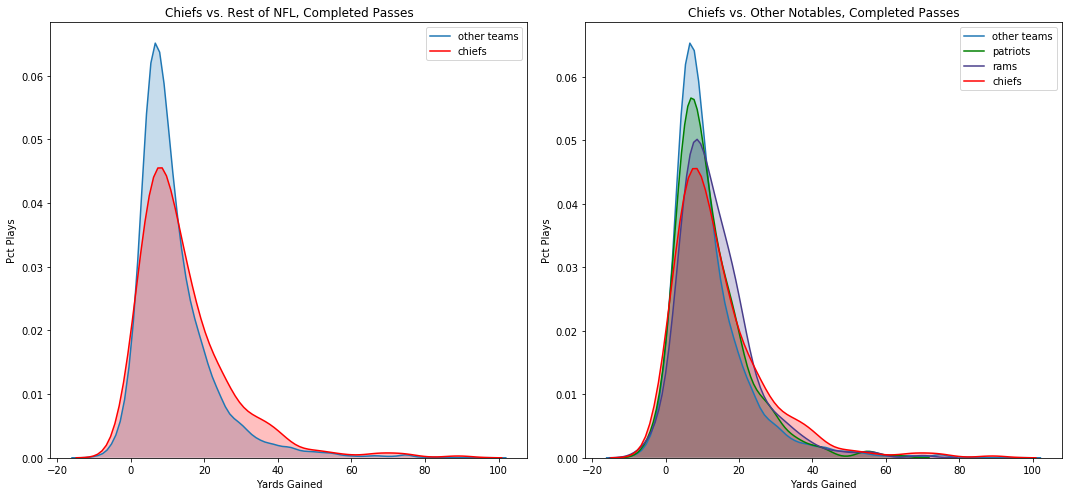

In [13]:
comp18 = completions.loc[completions.season==2018]
# print(comp18.posteam.unique())
chiefs18 = comp18.loc[comp18.posteam=='KC']
nchiefs18=comp18.loc[comp18.posteam!='KC']

rams18 = comp18.loc[comp18.posteam=='LA']
pats18 = comp18.loc[comp18.posteam=='NE']

teams = ['KC','LA','NE']
others18 = comp18.loc[~comp18.posteam.isin(teams)]

c_gains = chiefs18.yards_gained
nc_gains = nchiefs18.yards_gained


p_gains = pats18.yards_gained
r_gains = rams18.yards_gained
o_gains = others18.yards_gained

fig = plt.figure(figsize=(15,7))
ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(nc_gains, shade=True, label="other teams");
sns.kdeplot(c_gains, shade=True, color='r', label="chiefs");
ax1.set_title('Chiefs vs. Rest of NFL, Completed Passes')
ax1.set_xlabel('Yards Gained')
ax1.set_ylabel('Pct Plays')

ax2 = plt.subplot(1, 2, 2)

sns.kdeplot(o_gains, shade=True, label="other teams");
sns.kdeplot(p_gains, shade=True, color='green', label="patriots");
sns.kdeplot(r_gains, shade=True, color='darkslateblue', label="rams");
sns.kdeplot(c_gains, shade=True, color="r", label="chiefs");

ax2.set_title('Chiefs vs. Other Notables, Completed Passes')
ax2.set_xlabel('Yards Gained')
ax2.set_ylabel('Pct Plays')
fig.tight_layout()

fig.savefig('./images/chiefs.png', bbox_inches = "tight")
plt.show()

In [14]:
from scipy.stats import skew,kurtosis,normaltest

apk = 1/kurtosis(ap_gains)
pk = 1/kurtosis(p_gains)
rk = 1/kurtosis(r_gains)
ck = 1/kurtosis(c_gains)
ok = 1/kurtosis(o_gains)

kurts = [ck,rk,pk,ok]

apm = np.mean(ap_gains)
pm = np.mean(p_gains)
rm = np.mean(r_gains)
cm = np.mean(c_gains)
om = np.mean(o_gains)

means = [cm,rm,pm,om]

aps = np.mean(ap_gains)
ps = skew(p_gains)
rs = skew(r_gains)
cs = skew(c_gains)
os = skew(o_gains)

skews=[cs,rs,ps,os]

# normalize
nkurts = np.round((kurts - np.min(kurts))/np.ptp(kurts),2)
nmeans = np.round((means - np.min(means))/np.ptp(means),2)
nskews = np.round((skews - np.min(skews))/np.ptp(skews),2)




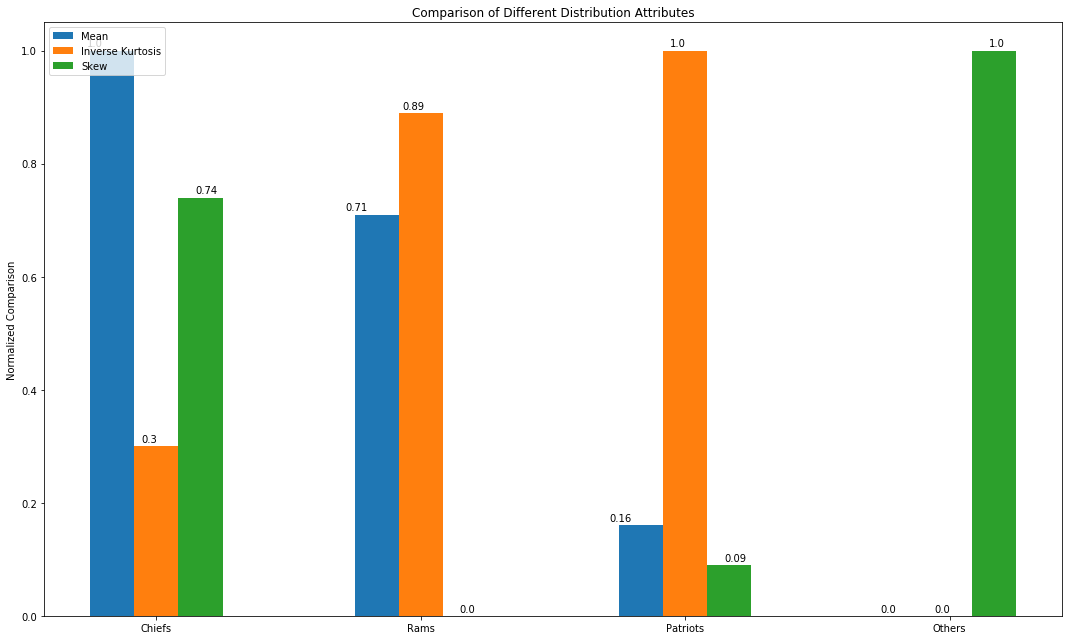

In [15]:
ind = np.arange(len(nmeans))  # the x locations for the groups
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(15,9))
rects1 = ax.bar(ind - width/3, nmeans, width/3, #yerr=std,
                label='Mean')
rects2 = ax.bar(ind, nkurts, width/3, #yerr=std,
                label='Inverse Kurtosis')
rects3 = ax.bar(ind + width/3, nskews, width/3, #yerr=std,
                label='Skew')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Normalized Comparison')
ax.set_title('Comparison of Different Distribution Attributes')
ax.set_xticks(ind)
ax.set_xticklabels(('Chiefs', 'Rams', 'Patriots', 'Others'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(offset[xpos]*2, 2),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "center")
autolabel(rects3, "right")
fig.tight_layout()

ax.legend(loc="upper left")
fig.savefig('./images/dist_measures.png', bbox_inches = "tight")
plt.show()

In [16]:
def gini(x):
    # (Warning: This is a concise implementation, but it is O(n**2)
    # in time and memory, where n = len(x).  *Don't* pass in huge
    # samples!)

    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g


print(np.mean(c_gains))
print(np.mean(o_gains))

print(gini(c_gains))
print(gini(r_gains))
print(gini(p_gains))
print(gini(o_gains))
print(gini(ap_gains))

14.483240223463687
11.757508460236886
0.43611998513115297
0.3809269727655998
0.40658552462389097
0.43650671222877746
0.6962480000222521


In [17]:
cgb = completions.groupby(['season','posteam'])['yards_gained'].apply(gini).reset_index()
avgb = completions.groupby(['season','posteam'])['yards_gained'].mean().reset_index()

cgb['team_id'] = cgb.season.map(str) + "_" + cgb.posteam
avgb['team_id'] = avgb.season.map(str) + "_" + avgb.posteam
expl = pd.merge(how='left',on='team_id',left=cgb,right=avgb)
expl = expl.rename(columns={'yards_gained_x':'Gini','yards_gained_y':'YPC'})
expl = expl[['team_id','Gini','YPC']]
print(expl)

      team_id      Gini        YPC
0    2009_ARI  0.364508  11.323077
1    2009_ATL  0.387380  11.576271
2    2009_BAL  0.421722  11.481013
3    2009_BUF  0.452778  11.405172
4    2009_CAR  0.407319  12.037037
5    2009_CHI  0.465848  11.365772
6    2009_CIN  0.372594  11.614786
7    2009_CLE  0.444582  10.673367
8    2009_DAL  0.430602  13.413295
9    2009_DEN  0.441002  11.879195
10   2009_DET  0.407540  11.326460
11    2009_GB  0.446128  13.944615
12   2009_HOU  0.418108  12.710983
13   2009_IND  0.409764  12.085308
14   2009_JAC  0.426795  11.788194
15    2009_KC  0.451485  11.341085
16   2009_MIA  0.402682  10.657718
17   2009_MIN  0.419878  12.982659
18    2009_NE  0.424238  12.016620
19    2009_NO  0.438429  12.394737
20   2009_NYG  0.436601  13.447811
21   2009_NYJ  0.446021  13.108696
22   2009_OAK  0.415485  11.458333
23   2009_PHI  0.473132  13.893082
24   2009_PIT  0.401228  13.445513
25    2009_SD  0.428761  13.791411
26   2009_SEA  0.431187  10.690691
27    2009_SF  0.461

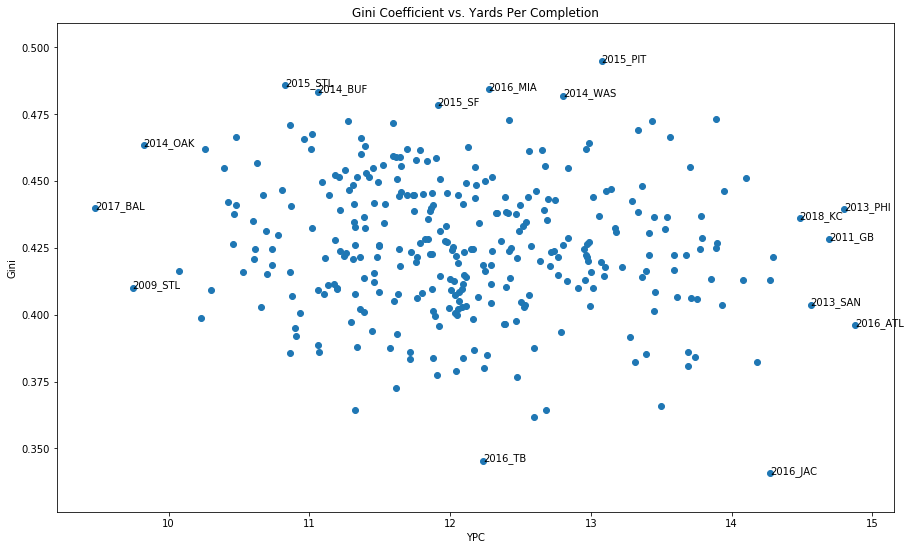

In [18]:
fig,ax = plt.subplots(figsize=(15,9))

x = expl.YPC
y = expl.Gini
n = expl.team_id

plt.scatter(x, y)

for i, txt in enumerate(n):
    if ((x[i] >= 14.3) | (x[i] <=10)):
        ax.annotate(txt, (x[i], y[i]))
    elif ((y[i] >= .475) | (y[i] <= .36)):
        ax.annotate(txt, (x[i], y[i]))
ax.set_title('Gini Coefficient vs. Yards Per Completion')
ax.set_xlabel('YPC')
ax.set_ylabel('Gini')

fig.savefig('./images/gini.png', bbox_inches = "tight")
plt.show()

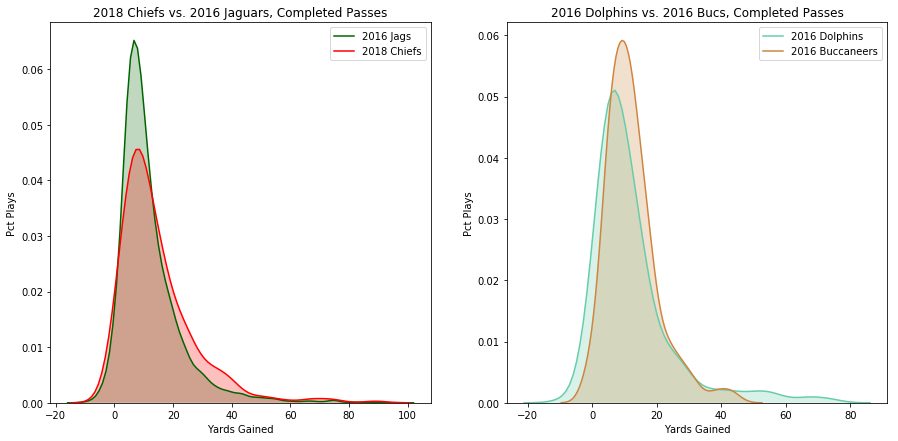

In [19]:
# print(comp18.posteam.unique())
chiefs18 = completions.loc[(completions.posteam=='KC') & (completions.season==2018)]
jags16 = completions.loc[(completions.posteam=='JAC') & (completions.season==2016)]

c_gains = chiefs18.yards_gained
j_gains = jags16.yards_gained

mia16 = completions.loc[(completions.posteam=='MIA') & (completions.season==2016)]
tb16 = completions.loc[(completions.posteam=='TB') & (completions.season==2016)]

m_gains = mia16.yards_gained
tb_gains = tb16.yards_gained

fig = plt.figure(figsize=(15,7))

ax1 = plt.subplot(1,2,1)

sns.kdeplot(nc_gains, shade=True, color='darkgreen', label="2016 Jags");
sns.kdeplot(c_gains, shade=True, color='r', label="2018 Chiefs");
ax1.set_title('2018 Chiefs vs. 2016 Jaguars, Completed Passes')
ax1.set_xlabel('Yards Gained')
ax1.set_ylabel('Pct Plays')

ax2 = plt.subplot(1,2,2)

sns.kdeplot(m_gains, shade=True, color='mediumaquamarine', label="2016 Dolphins");
sns.kdeplot(tb_gains, shade=True, color='peru', label="2016 Buccaneers");
ax2.set_title('2016 Dolphins vs. 2016 Bucs, Completed Passes')
ax2.set_xlabel('Yards Gained')
ax2.set_ylabel('Pct Plays')

fig.savefig('./images/gini_comparison.png', bbox_inches = "tight")
plt.show()

In [20]:
expl['rating'] = expl['Gini'] * 2*expl['YPC']
print(expl[['team_id','rating']].sort_values(by='rating',ascending=False))

      team_id     rating
23   2009_PHI  13.146513
151  2013_PHI  13.005253
218  2015_PIT  12.938941
125   2012_TB  12.719890
275   2017_LA  12.696024
55   2010_PHI  12.654558
306   2018_KC  12.632861
75    2011_GB  12.584503
188  2014_SEA  12.510612
59    2010_SF  12.479347
11    2009_GB  12.442168
193  2014_WAS  12.336434
73   2011_DEN  12.059726
318  2018_SEA  12.057604
319   2018_SF  12.042977
98   2012_BAL  11.978202
208  2015_JAC  11.972624
244  2016_MIA  11.888246
84   2011_NYG  11.854850
25    2009_SD  11.826452
155  2013_SEA  11.817372
198  2015_CAR  11.800857
100  2012_CAR  11.790251
227  2016_ATL  11.787801
127  2012_WAS  11.767655
153  2013_SAN  11.757812
54   2010_OAK  11.743036
20   2009_NYG  11.742657
274   2017_KC  11.736915
173   2014_GB  11.693866
..        ...        ...
206  2015_HOU   9.042269
322  2018_WAS   9.034214
48   2010_MIA   9.015601
71   2011_CLE   9.010227
165  2014_CAR   8.992945
305  2018_JAX   8.987398
195  2015_ATL   8.986249
92   2011_STL   8.979073


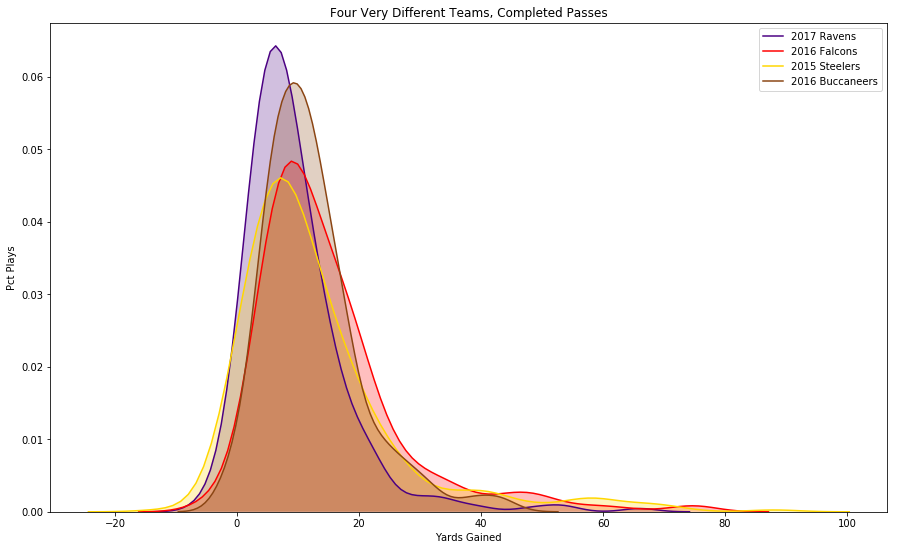

In [21]:
# print(comp18.posteam.unique())
bal17 = completions.loc[(completions.posteam=='BAL') & (completions.season==2017)]
atl16 = completions.loc[(completions.posteam=='ATL') & (completions.season==2016)]

b_gains = bal17.yards_gained
a_gains = atl16.yards_gained

pit15 = completions.loc[(completions.posteam=='PIT') & (completions.season==2015)]
tb16 = completions.loc[(completions.posteam=='TB') & (completions.season==2016)]

pit_gains = pit15.yards_gained
tb_gains = tb16.yards_gained

# fig = plt.figure(figsize=(15,7))

# ax1 = plt.subplot(1,2,1)

fig, ax = plt.subplots(figsize=(15,9))

sns.kdeplot(b_gains, shade=True, color='indigo', label="2017 Ravens");
sns.kdeplot(a_gains, shade=True, color='r', label="2016 Falcons");
ax.set_title('Four Very Different Teams, Completed Passes')
ax.set_xlabel('Yards Gained')
ax.set_ylabel('Pct Plays')

# ax2 = plt.subplot(1,2,2)

sns.kdeplot(pit_gains, shade=True, color='gold', label="2015 Steelers");
sns.kdeplot(tb_gains, shade=True, color='saddlebrown', label="2016 Buccaneers");
# ax2.set_title('2016 Dolphins vs. 2016 Bucs, Completed Passes')
# ax2.set_xlabel('Yards Gained')
# ax2.set_ylabel('Pct Plays')

fig.savefig('./images/four_corners.png', bbox_inches = "tight")
plt.show()